Integrantes:
* Raúl Monzon 17014
* David Valenzuela 171001
* Marcos Gutierrez
* Fernando Hengstenberg 17699


# <center> Redes Neuronales Convolucionales (CNN) </center>

Dependencias
---

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep
from subprocess import check_output
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

print(os.listdir("../input/rsna-bone-age"))
print(check_output(["ls", "../input/rsna-bone-age"]).decode("utf8"))

['boneage-training-dataset', 'boneage-test-dataset', 'boneage-test-dataset.csv', 'boneage-training-dataset.csv']
boneage-test-dataset
boneage-test-dataset.csv
boneage-training-dataset
boneage-training-dataset.csv



Analisis exploratorio y limpieza de datos (breve)
---

Se recompílaron 12611 imagenes del folder de training set
Imagen de ejemplo: 
4592.png


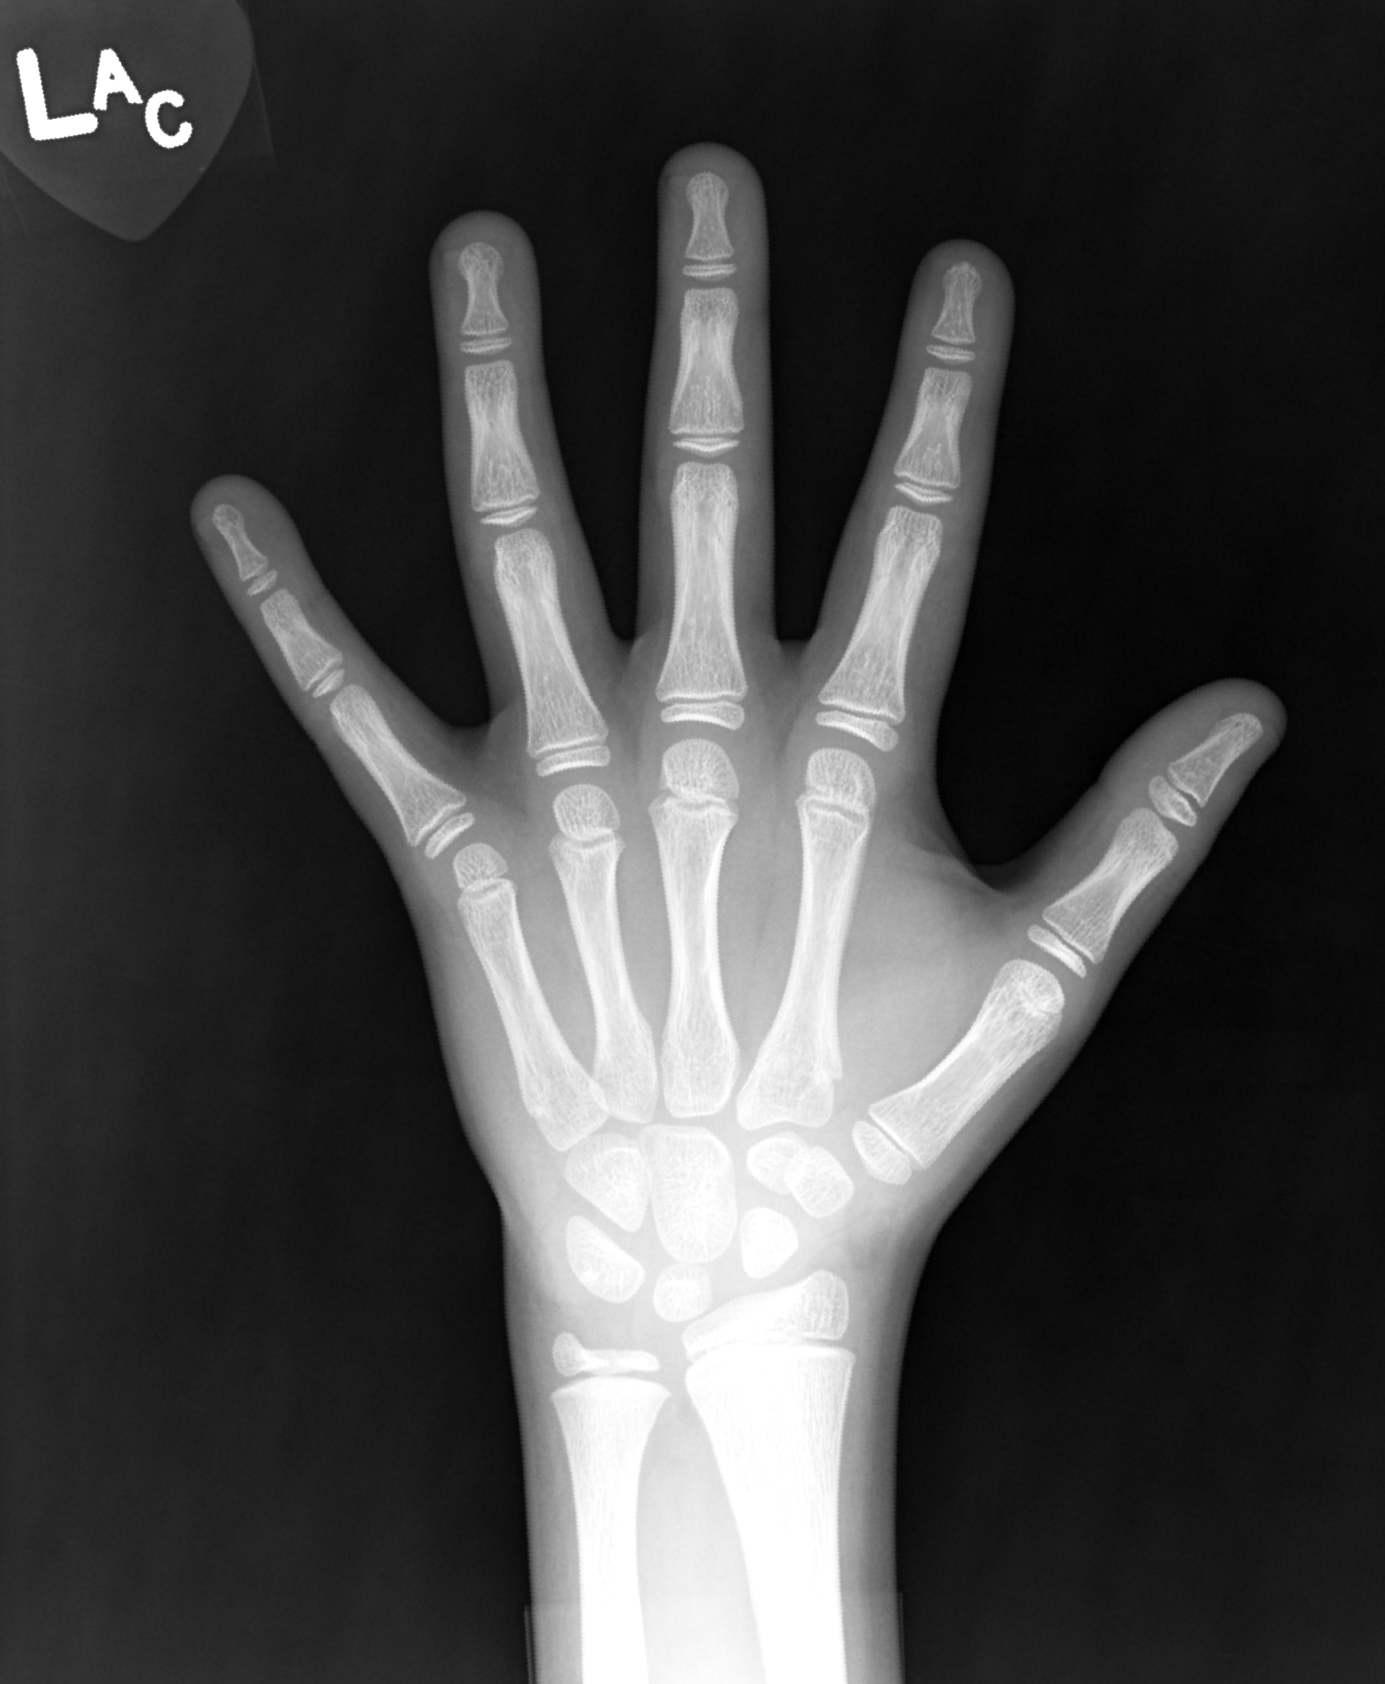

In [2]:
folder = "../input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset"
folder_test = "../input/rsna-bone-age/boneage-test-dataset/boneage-test-dataset"

onlyfiles = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
onlyfiles_test = [f for f in os.listdir(folder_test) if os.path.isfile(os.path.join(folder_test, f))]
 
print("Se recompílaron {0} imagenes del folder de training set".format(len(onlyfiles)))
print("Imagen de ejemplo: ")

print(onlyfiles[45])
display(_Imgdis(filename=folder + "/" + onlyfiles[45], width=240, height=320))
    


Guardamos todas las imagenes en un Dataframe y lo juntamos con su csv respectivo

In [3]:
train_files = []
test_files = []

for _file in onlyfiles:
    train_files.append(_file)
print("Hay %d en el array de training" % len(train_files))
img_df = pd.DataFrame(data = train_files, index=None, columns = None)
csv_df = pd.read_csv("../input/rsna-bone-age/boneage-training-dataset.csv")
df_train = pd.concat([img_df,csv_df],axis = 1)
df_train = df_train.rename(index=str, columns={0: "file"})

for _file in onlyfiles_test:
    test_files.append(_file)
print("Hay %d en el array de test" % len(test_files))
img_df_test = pd.DataFrame(data = test_files, index=None, columns = None)
csv_df_test = pd.read_csv("../input/rsna-bone-age/boneage-test-dataset.csv")
df_test = pd.concat([img_df_test,csv_df_test],axis = 1)
df_test = df_test.rename(index=str, columns={0: "file"})

#print (df_test)

Hay 12611 en el array de training
Hay 200 en el array de test


In [4]:
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model.add(Convolution2D(filters = 32, 
                        kernel_size = (3, 3),
                        input_shape = (240, 320, 3),
                        activation = 'relu'))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Convolution2D(32, 3, 3, activation = 'relu'))

model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(units = 128, activation = 'relu'))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = 'adam' ,
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.1, 
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

folder = "../input/rsna-bone-age/boneage-training-dataset"
folder_test = "../input/rsna-bone-age/boneage-test-dataset"
training_set = train_datagen.flow_from_directory(folder,
                                                 target_size = (240, 320),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(folder_test,
                                            target_size = (240, 320),
                                            batch_size = 32,
                                            class_mode = 'categorical')

model.fit_generator(training_set,
                    steps_per_epoch = 100,
                    epochs = 15,
                    validation_data = test_set,
                    validation_steps = 20)

Found 12611 images belonging to 1 classes.
Found 200 images belonging to 1 classes.
Epoch 1/15
100/100 [==============================] - 241s 2s/step - loss: 0.0080 - accuracy: 0.9937 - val_loss: 4.5321e-14 - val_accuracy: 1.0000
Epoch 2/15
100/100 [==============================] - 228s 2s/step - loss: 9.1143e-15 - accuracy: 1.0000
Epoch 3/15
100/100 [==============================] - 225s 2s/step - loss: 5.7557e-15 - accuracy: 1.0000
Epoch 4/15
100/100 [==============================] - 222s 2s/step - loss: 9.2746e-15 - accuracy: 1.0000
Epoch 5/15
100/100 [==============================] - 221s 2s/step - loss: 2.8506e-15 - accuracy: 1.0000
Epoch 6/15
100/100 [==============================] - 220s 2s/step - loss: 8.4457e-15 - accuracy: 1.0000
Epoch 7/15
100/100 [==============================] - 220s 2s/step - loss: 2.5148e-14 - accuracy: 1.0000
Epoch 8/15
100/100 [==============================] - 218s 2s/step - loss: 4.2592e-16 - accuracy: 1.0000
Epoch 9/15
100/100 [==============